# Coverage Path Planning using Tango based on Unified-Planning

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aristos_cpp.map import Parser
from aristos_cpp.coverage_planner import CoveragePlanner
from aristos_cpp.plot_utils import PlotUtils
from PIL import Image, ImageDraw    

import warnings
warnings.filterwarnings("ignore")

## Main

### Import maps

In [2]:
# Paths to your YAML configuration files
# Comment-out the map you want to use

# # 1-  Domokos Map
hard_map = 'maps/map_domokos.yaml'
soft_map = 'maps/unsafe_domokos.yaml'
robot_config = 'maps/robot_dim.yaml'


# # 2-  IT Map
# hard_map = 'maps/map_it_right.yaml'
# soft_map = 'maps/unsafe_it.yaml'
# robot_config = 'maps/robot_dim.yaml'

### Planner

You can specify the selected area you want to plan, either in meters or in pixels.
For meters, the boundaries:

- yaml files give origin that corresponds to xmin and ymin
- $ xmax ​= xmin ​+ (Width in pixels×Resolution)$ and $ ymax ​= ymin ​+ (Height in pixels×Resolution) $


In [3]:
# Initialize the coverage planner
planner = CoveragePlanner(hard_map=hard_map, soft_map = soft_map, robot_config=robot_config)

# Example polygon (rectangle) defined in meters (x, y)
# For example Domokos Map .png has boundaries at xmin=-232.66, xmax=12.321152, ymin=-34.579, ymax=159.968374 
# For another map.png given xmin, ymin --> [ xmax ​= xmin ​+ (Width in pixels×Resolution), ymax ​= ymin ​+ (Height in pixels×Resolution) where pixels correspond to grid size]

polygon = [
    (3.0, 0.0),   # Bottom-right corner
    (3.0, 18.0),   # Top-right corner
    (-16.0, 18.0),   # Top-left corner
    (-16.0, 0.0)    # Bottom-left corner
]

# Area in Domokos Map that correspond to the center of the map where there are side free corridors
# The origin of the path is the upper left corner of the polygon
# polygon = [
#     (-98.0, 10.0),   # Bottom-right corner
#     (-98.0, 26.0),   # Top-right corner
#     (-112.0, 26.0),   # Top-left corner
#     (-112.0, 10.0)    # Bottom-left corner
# ]

# Run the planner to get the path
# - abs path is the path in the absolute map coordinate system
# - rescaled path is the path in the high-dimensional grid coordinate system
# - path is the path in the in the low-dimensional grid coordinate system
abs_path, rescaled_path, path = planner.run(polygon=polygon)

Number of soft cells: 183


0it [00:00, ?it/s]


ValueError: data must be of shape (n, m), where there aren points of dimension m

## Plots

### Show selected polygon onto the map

In [ ]:
# map type can be "original", "dilated", "eroded" and "downscaled" returns only the selected area
im_total, im_selected = planner.map.show(map_type="original", reverse=True, draw_contour=True)
im_total

AttributeError: 'NoneType' object has no attribute 'astype'

### Show selected polygon of the map for coverage

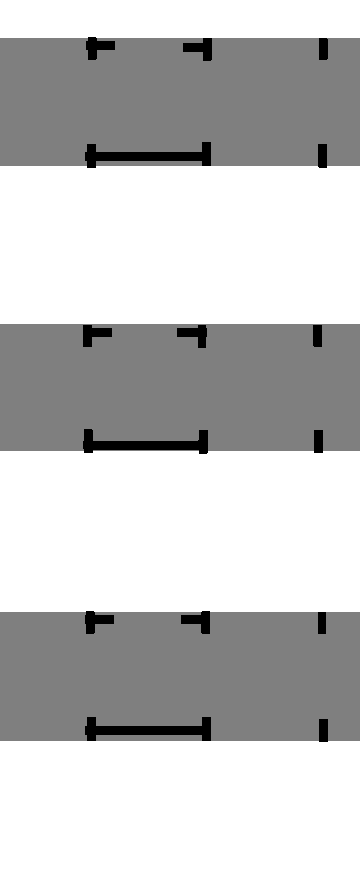

In [ ]:
im_selected

In [ ]:
# Initialize PlotUtils with the map parser from the planner
plot_utils = PlotUtils(map_parser=planner.map)

### Show path in low-dimensional grid

In [ ]:
# map type can be "original", "dilated", "eroded" 
plot_utils.plot_grid_with_path(map_type='dilated', path=path)

NameError: name 'path' is not defined

### Show rescaled path in high-dimensional grid

In [ ]:
# map type can be "original", "dilated", "eroded" 
plot_utils.plot_map_with_path(map_type='dilated', path=rescaled_path)